In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import wordcloud

# Set a clean and minimalist style
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 10, 'font.family': 'sans-serif'})

# Choose a soft, muted color palette
sns.set_palette('muted')

In [3]:
all_files = [f"fetched_audiofeatures/track_data_{i}.csv" for i in range(0, 175250, 50)]
df_list = [pd.read_csv(file) for file in all_files]
df = pd.concat(df_list, ignore_index=True)

df.drop_duplicates(inplace=True, subset='uri')

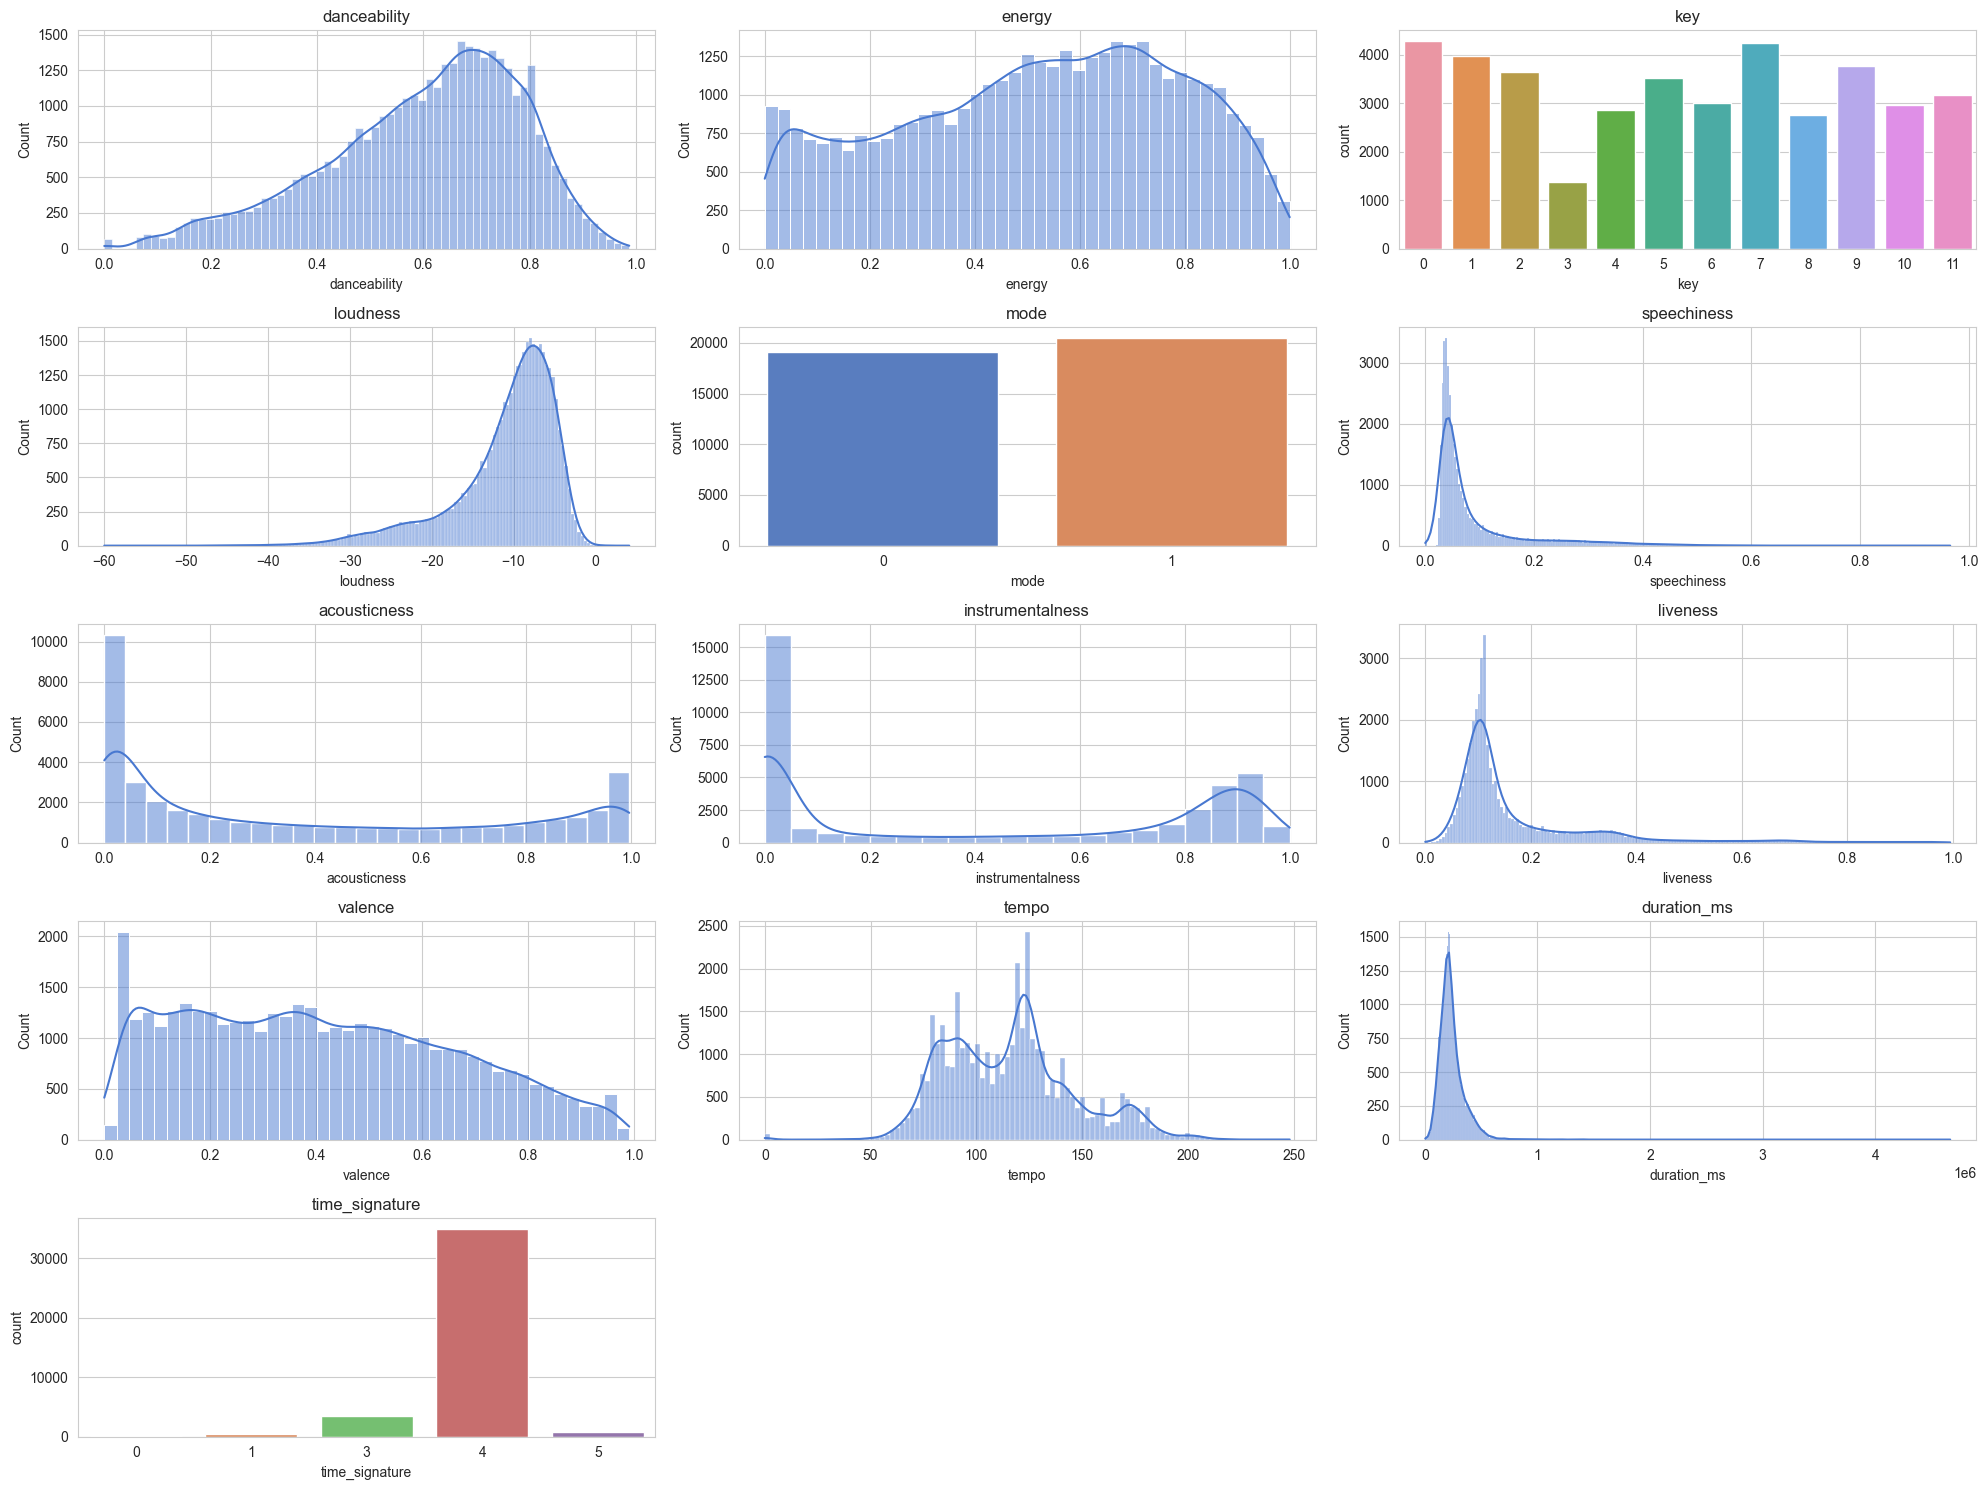

In [8]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# A list of columns to visualize
columns_to_visualize = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                        'duration_ms', 'time_signature']

# Iterate over the columns and create a subplot for each one
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(5, 3, i)
    if column in ['key', 'mode', 'time_signature']:
        # For categorical data, use countplot
        sns.countplot(x=column, data=df)
    else:
        # For numerical data, use histplot
        sns.histplot(df[column], kde=True)
    plt.title(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix of Audio Features')

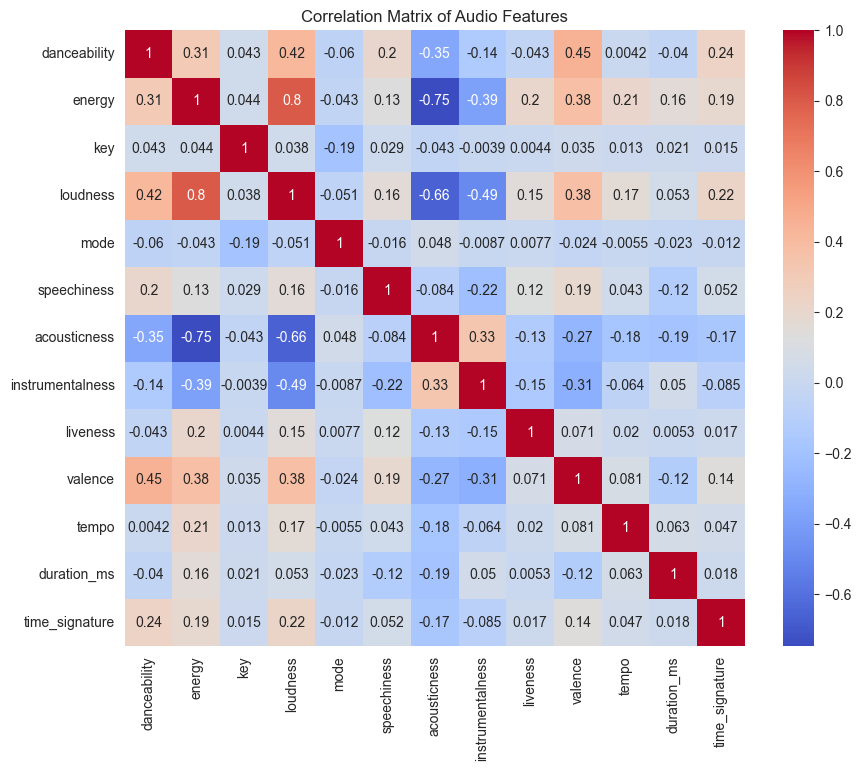

In [14]:
corr = df[columns_to_visualize].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Audio Features')

Text(0.5, 1.02, 'Pair Plot of Selected Audio Features')

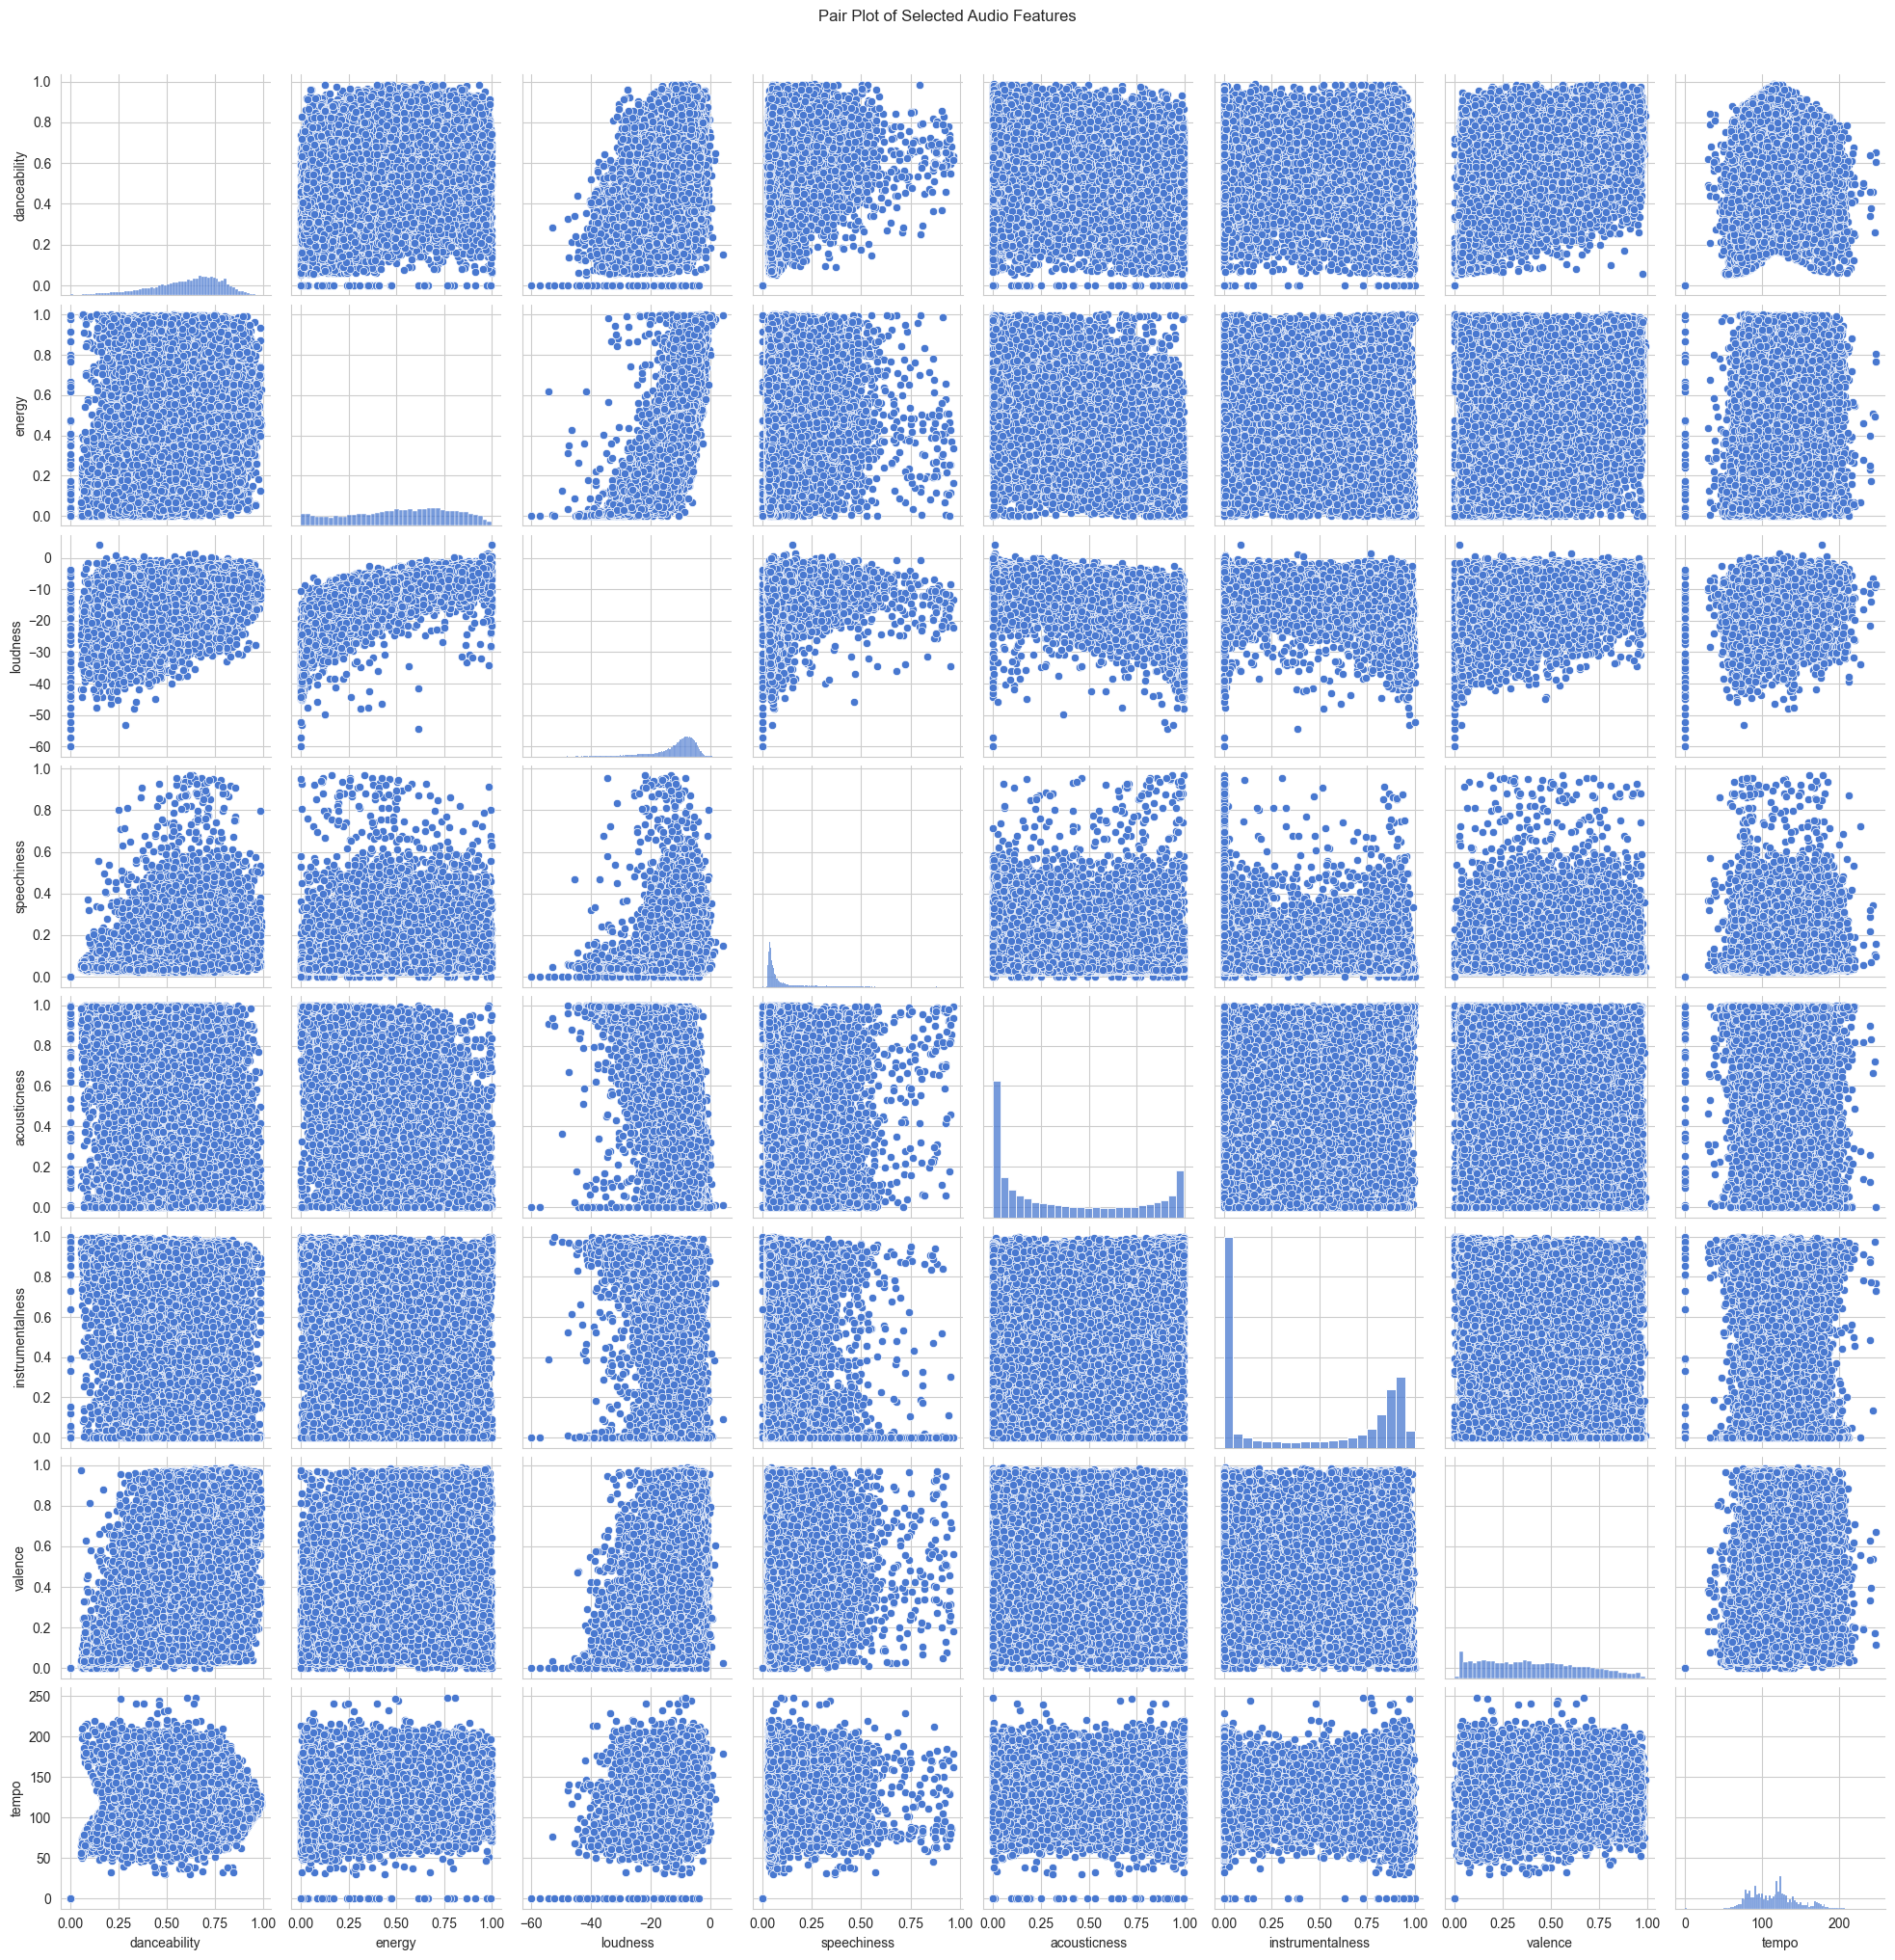

In [17]:
sns.pairplot(df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']])
plt.suptitle('Pair Plot of Selected Audio Features', y=1.02)

Text(0.5, 1.0, 'Energy Distribution by Musical Key')

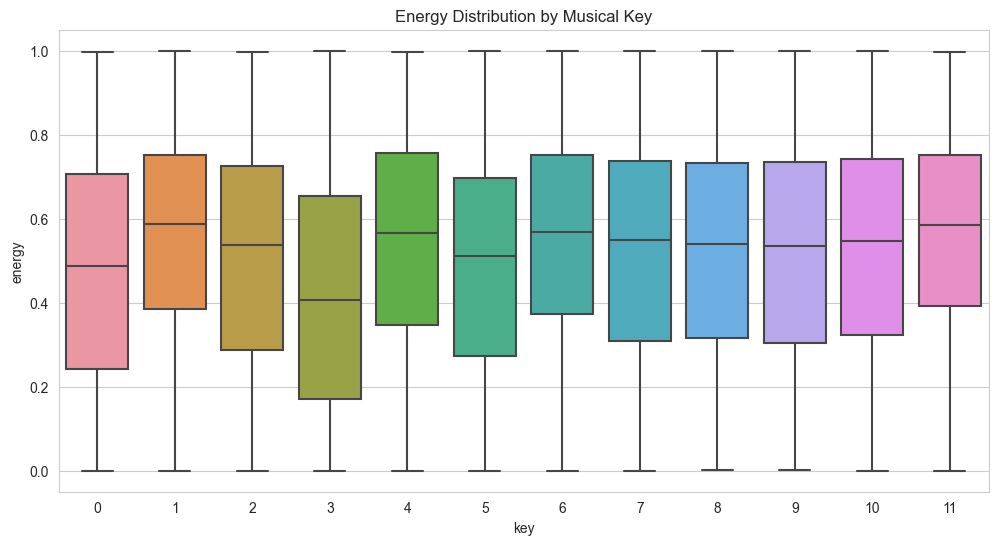

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='key', y='energy', data=df)
plt.title('Energy Distribution by Musical Key')

Text(0.5, 1.0, 'Energy Distribution by Musical Key')

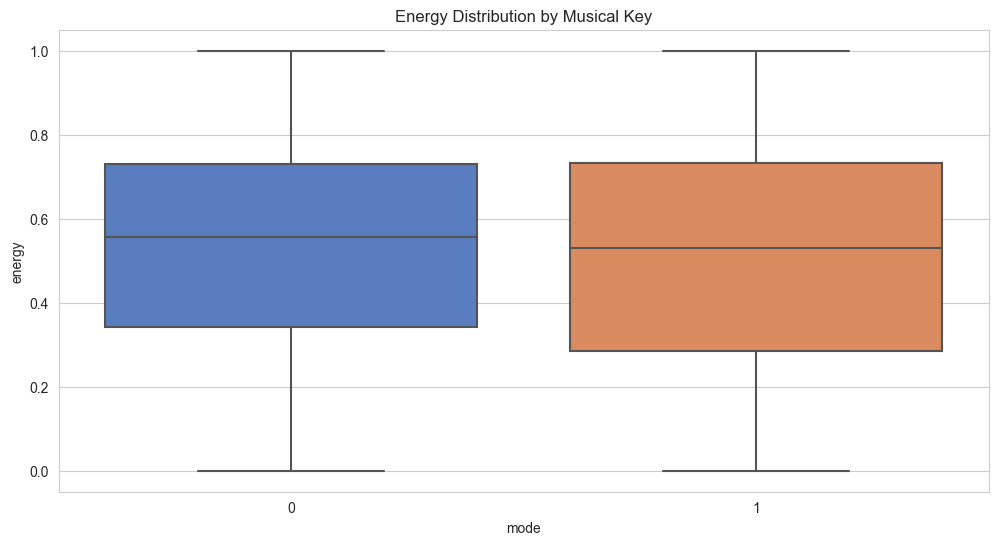

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='mode', y='energy', data=df)
plt.title('Energy Distribution by Musical Key')

Text(0.5, 1.0, 'Energy Distribution by Musical Key')

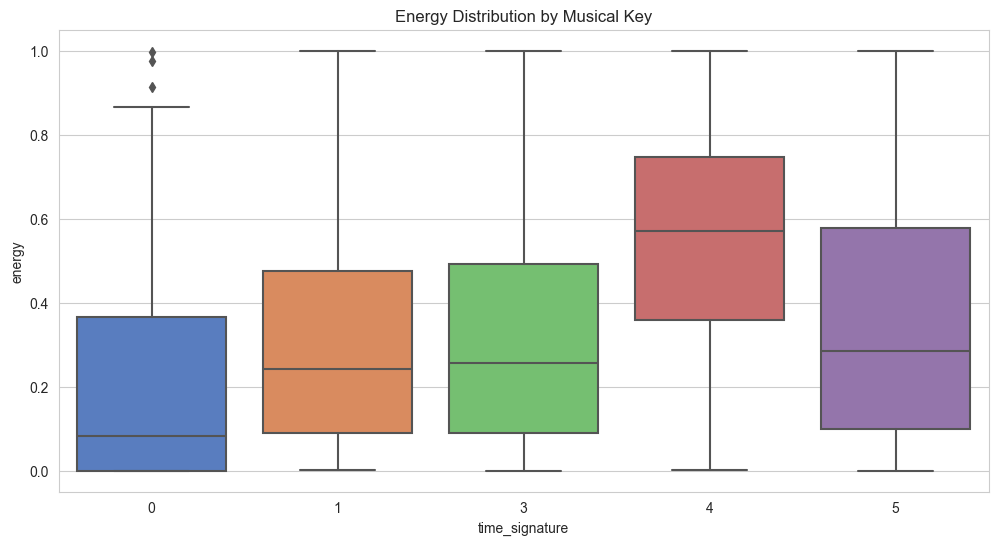

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='time_signature', y='energy', data=df)
plt.title('Energy Distribution by Musical Key')